# Tema 10: Procesamiento del Lenguaje Natural (III) - PoS-tagging
En este cuaderno vamos a hacer etiquetado morfológico (o _PoS-tagging_) en inglés. Primero veremos cómo se hace en un solo corpus y después compararemos visualmente los resultados con otros corpus. Veremos otras pequeñas funciones para explorar un corpus. Aprenderemos el concepto de frecuencias normalizadas y por qué son importantes en PLN.
## Etiquetado morfológico o _PoS-tagging_
Antes de nada, ¿qué es eso del etiquetado morfológico? ¿Qué es una PoS?

Nos referimos a los tipos de palabras que hay: nombres, adjetivos, verbos, preposiciones, pronombres, adverbios, conjunciones... que podemos llamar tanto _categorías gramaticales_ como _partes del discurso_, y eso es exactamente lo que significa _PoS_ en inglés, _part of speech_.

PoS-tagging vendría a ser, por tanto, dar a cada palabra de un texto ese "metadato" sobre su naturaleza gramatical, normalmente convirtiendo una lista de palabras en una lista de parejas (o _tuplas_, como se llaman en Python) de palabra-PoS.

## _PoS-tagging_ de un corpus

### Abrir un corpus y almacenar su contenido
El texto con el que vamos a trabajar se encuentra en el archivo `austen-emma.txt`, que está en el directorio `nltk_data/corpora/gutenberg`.

Antes de nada, tenemos que extraer todo el texto contenido en el archivo para poder procesarlo con Python. Lo extraeremos en la variable _raw_. Podemos imprimir los primeros 300 caracteres de _raw_ para mirar qué hay en esa variable.

In [2]:
import nltk

raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(raw[:300])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was t


### Tokenizar el texto
Llamamos _tokenizar_ a separar el texto en palabras. En realidad, estamos partiendo en trozos y considerando _tokens_ todo aquello que esté separado por espacios o sean signos de puntuación, es decir, todo lo que no sean espacios. Y esos trozos los meteremos como elementos de una lista.

¿Por qué hace falta tokenizar el texto antes de hacer el etiquetado? Porque si le pasamos el texto en crudo para que nos devuelva las PoSes, intentará sacar la PoS de cada carácter.

En primer lugar tenemos que importar los módulos que vamos a utilizar. A continuación solo tenemos que usar la función `word_tokenize()` sobre la variable en que habíamos guardado el texto en crudo (`raw`) para que nos devuelva la lista de palabras. Guardamos esa lista en la variable `tokens`.

In [3]:
from nltk import word_tokenize, pos_tag

tokens = word_tokenize(raw)

print(tokens[:60])
print(len(tokens))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was']
191785


Podemos imprimir los primeros tokens para ver que todo ha salido bien y también podemos ver cuántos hay en total.

### _PoS-tagging_
La función `nltk.pos_tag()` es ya la que nos devuelve la PoS de cada palabra.

Fíjate en el valor que ha creado al lado de cada palabra; se deduce enseguida a qué corresponden, pero también puedes consultar la [lista de equivalencias completa](https://stackoverflow.com/a/38264311).

In [4]:
tagged = nltk.pos_tag(tokens)

print(tagged[:100])

[('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('of', 'IN'), ('existence', 'NN'), (';', ':'), ('and', 'CC'), ('had', 'VBD'), ('lived', 'VBN'), ('nearly', 'RB'), ('twenty-one', 'CD'), ('years', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN'), ('with', 'IN'), ('very', 'RB'), ('little', 'JJ'), ('to', 'TO'), ('distress', 'VB'), ('or', 'CC'), ('vex', 'VB'), ('her', 'PRP'), ('.', '.'), ('She', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('younge

Podemos ver qué PoSes distintas contiene el libro y cuántas son.

Para ello podemos iterar con un `for` sobre la lista `tagged` y que, para cada elemento que encuentre, que hemos llamado _dupla_, queremos que tome el segundo valor y lo añada a la lista `PoSes` que hemos creado un par de líneas antes.

Después, con nuestra vieja amiga `set()`, estamos eligiendo solo los valores distintos que hay dentro de `PoSes`. Podemos imprimirlo y podemos imprimir su longitud (con otra vieja amiga, `len()`) para ver cuáles y cuántas son las PoSes que aparecen en el libro.

In [5]:
PoSes = []

for dupla in tagged:
    PoSes.append(dupla[1])

PoSes = set(PoSes)

print(PoSes)
print(len(PoSes))

{'PRP', 'PDT', 'VBP', '``', 'WP$', 'JJS', 'CD', 'IN', ',', 'VB', "''", 'DT', ')', 'POS', 'RBR', 'VBD', 'PRP$', 'WDT', 'WP', ':', 'NNPS', 'WRB', 'RP', '$', '(', 'JJR', 'TO', 'RB', 'RBS', 'MD', 'NNS', 'NNP', 'UH', 'FW', 'EX', 'VBZ', 'VBN', 'JJ', 'VBG', '.', 'NN', 'CC'}
42


### Contar una determinada PoS

Saber las PoSes de un corpus puede servir para discriminar por PoSes, es decir, ver cuáles son todos los nombres, verbos, adjetivos, adverbios... Estas cuatro categorías, especialmente, nos van a dar una buena idea del léxico (es decir, el [campo semántico](https://es.wikipedia.org/wiki/Campo_sem%C3%A1ntico)) utilizado en cada corpus que tratemos, porque son las categorías que llevan, en mayor parte, la carga semántica. Compara las oraciones:

1. El médico operaba en su quirófano desinfectado.
2. El jardinero podaba en su jardín floreciente.

En el ámbito médico no esperamos encontrar palabras como _jardinero_, _podar_, _jardín_ o _floreciente_, y en un texto sobre jardinería no encontraríamos los nombres, verbos, adjetivos o adverbios como los de la oración (1). ¡Sin embargo, el resto de las palabras las comparten!

Es curioso que esta distinción coincida con la que separa entre lo que los lingüistas llamamos _categorías abiertas_ y _cerradas_. Las categorías abiertas son relativamente fáciles de ampliar: creamos constantemente nuevos nombres y adjetivos, pero el proceso de creación de una nueva conjunción, por ejemplo, es mucho más largo.

Vamos a fijarnos, por tanto, en dos categorías con mucha carga semántica, como son los nombres y los verbos.

Por cada elemento que hay en nuestra variable _tagged_ vamos a fijarnos en el segundo elemento (lo que indicamos con tupla[1]). Solo nos interesa cuando mide más de un carácter, así que ponemos esa condición con _if_ para seguir avanzando. Si además los dos primeros elementos de la tupla (es decir, los dos primeros caracteres) coinciden con "NN", entonces nos sigue interesando. Entonces le ordenamos al programa que en ese caso, el primer elemento de la tupla lo vaya anexando a la variable _nombres_ (que hemos declarado anteriormente como lista).

Después, es sencillo imprimir un mensaje jugando con los atributos de esa lista.

In [6]:
nombres = []

for tupla in tagged:
    if len(tupla[1]) > 1:
        if tupla[1][:2] == 'NN':
            nombres.append(tupla[0])

title = "Emma"
            
print("Hay ", len(nombres), " nombres en total en ", title, ", de los cuales ", len(set(nombres)),
      " son distintos. Estos son los 50 primeros:", sep = '')
print(nombres[:50])

Hay 32045 nombres en total en Emma, de los cuales 4487 son distintos. Estos son los 50 primeros:
['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world', 'daughters', 'father', 'consequence', 'sister', 'marriage', 'mistress', 'house', 'period', 'mother', 'remembrance', 'caresses', 'place', 'woman', 'governess', 'mother', 'affection', 'years', 'Miss', 'Taylor', 'Mr.', 'Woodhouse', 'family', 'governess', 'friend', 'fond', 'daughters', 'Emma', 'Between', 'intimacy', 'sisters', 'Miss', 'Taylor', 'office', 'governess']


Y así podemos sacar cualquier PoS, es cuestión de dar con la regla que nos permita cazar cada ejemplar.

In [7]:
verbos = []

for tupla in tagged:
    if len(tupla[1]) > 1:
        if tupla[1][:1] == 'V':
            verbos.append(tupla[0])

print("Hay ", len(verbos), " verbos en total en ", title, ", de los cuales ", len(set(verbos)),
      " son distintos. Estos son los 50 primeros:", sep = '')
print(verbos[:50])

Hay 31349 verbos en total en Emma, de los cuales 2872 son distintos. Estos son los 50 primeros:
['CHAPTER', 'seemed', 'unite', 'had', 'lived', 'distress', 'vex', 'was', 'had', 'been', 'had', 'died', 'have', 'had', 'been', 'supplied', 'had', 'fallen', 'had', 'been', '_them_', 'was', 'had', 'ceased', 'hold', 'had', 'allowed', 'impose', 'being', 'passed', 'had', 'been', 'living', 'friend', 'attached', 'doing', 'liked', 'esteeming', 'directed', 'were', 'having', 'think', 'were', 'threatened', 'was', 'did', 'came', 'married', 'was', 'brought']


## Comparar PoSes de distintos corpus
Ahora vamos a aplicar todo lo que hemos aprendido hasta ahora en distintos corpus a la vez.

Lo primero que vamos a hacer es una función que aplique los pasos del 1 al 3 que hemos hecho antes con un corpus. Así, solo tendremos que llamarla y pasarle el argumento que apunte al corpus que queramos para que nos devuelva directamente la lista de palabras-PoSes. Por eso la hemos llamado directamente `tag()`:

In [8]:
def tag(raw):
    tokens = word_tokenize(raw)
    tagged = nltk.pos_tag(tokens)
    return tagged

Después, tiene sentido crear distintas funciones para contar distintas PoSes. De nuevo recuperamos las condiciones que pusimos antes para obtener nombres y verbos. Vamos a hacer que nos devuelva dos valores: el del número total de formas nominales/verbales que aparecen en el texto y el del número total de formas **distintas** que aparecen.

In [9]:
def count_nouns(tagged_text):
    nouns = []
    for tupla in tagged_text:
        if len(tupla[1]) > 1:
            if tupla[1][:2] == 'NN':
                nouns.append(tupla[0])
    return len(nouns), len(set(nouns))

def count_verbs(tagged_text):
    verbs = []
    for tupla in tagged_text:
        if tupla[1][:1] == 'V':
            verbs.append(tupla[0])
    return len(verbs), len(set(verbs))

Ahora simplemente vamos a hacer un diccionario manejable con los corpus que vamos a querer comparar. Guardamos en cada valor el sitio en que está el archivo de texto, para solo tener que usarlo una vez, y en cada clave un título descriptivo:

In [10]:
gutenberg_corpus = {
    "Emma": "austen-emma.txt", # "Emma", de Jane Austen
    "Persuasion": "austen-persuasion.txt", # "Persuasión", de Jane Austen
    "Sense": "austen-sense.txt", # "Sentido y sensibilidad", de Jane Austen
    "Caesar": "shakespeare-caesar.txt", # "Julius Caesar", de Shakespeare
    "Hamlet": "shakespeare-hamlet.txt", # "Hamlet", de Shakespeare
    "Macbeth": "shakespeare-macbeth.txt", # "Macbeth", de Shakespeare
    "Alice": "carroll-alice.txt", # "Alicia en el país de las maravillas", de Lewis Carroll
    "Paradise": "milton-paradise.txt", # "El paraíso perdido", de John Milton
    "Leaves": "whitman-leaves.txt", # "Hojas de hierba", de Walt Whitman
    "Bible": "bible-kjv.txt", # La Biblia, versión de King James
}

A continuación leemos todos los libros y metemos como claves de un diccionario los títulos, y como valores, diccionarios que contienen las claves `raw` y `tagged` y como valores los textos en bruto y los textos anotados. Como esta celda va a tardar un poco en tardar, podemos hacer que por cada libro que esté procesando se imprima un mensaje por pantalla para que sea más amena la espera: 

In [11]:
books = {}

for name, fileid in gutenberg_corpus.items():
    print("Cargando ", name, "...", sep = '')
    books[name] = {'raw': nltk.corpus.gutenberg.raw(fileid),
                   'tagged': tag(nltk.corpus.gutenberg.raw(fileid))}

print("¡Listo!")

Cargando Emma...
Cargando Persuasion...
Cargando Sense...
Cargando Caesar...
Cargando Hamlet...
Cargando Macbeth...
Cargando Alice...
Cargando Paradise...
Cargando Leaves...
Cargando Bible...
¡Listo!


Finalmente, creamos una función de funciones que acabamos de crear nosotros. Como le estamos diciendo que nos devuelva dos valores, que a su vez son dobles, lo que nos devuelva serán 4 valores, guardados en una lista de dos duplas.

In [12]:
def count(book_id):
    tagged_text = books[book_id]["tagged"]
    nouns = count_nouns(tagged_text)
    verbs = count_verbs(tagged_text)     
    return [nouns, verbs]    

Vamos a probar si ha funcionado todo esto probando con algunos corpus. Puedes elegir los que quieras de la lista de arriba y sustituirlos para ver cuántos nombres y verbos salen en cada uno. Vemos que, en general, salen más nombres que verbos.

In [13]:
print(count("Emma"))
print(count("Persuasion"))
print(count("Sense"))
print(count("Bible"))

[(32045, 4487), (31349, 2872)]
[(17533, 3095), (16038, 2131)]
[(24302, 3527), (22285, 2563)]
[(202436, 10226), (126415, 4353)]


### Comparar formas y lemas totales
Ahora tenemos que decidir qué comparar. No tiene sentido comparar apariciones totales de una misma PoS con apariciones únicas de otra; tendremos que comparar valores que representen lo mismo para cada corpus. Por tanto, tenemos que reordenar un poco estas listas que tenemos ahora.

Vamos a llamar, por abreviar, `tokens` a las __apariciones totales__ de nombres o verbos y `types` a las __apariciones únicas__. Nos interesa tener, por un lado, una lista de tokens (nominales y verbales) y, por otro, una lista de types. Así luego podremos pintar cada tipo de aparición por su lado.

In [14]:
def reordenar(counts):
    tokens = []
    types = []
    for value in counts:
        tokens.append(value[0])
        types.append(value[1])
    return tokens, types

Ahora sacamos la lista de tokens y la lista de types para cada libro. La siguiente celda tardará unos minutos en ejecutarse cada vez.

In [15]:
for book_id, fileid in books.items():
    tokens, types = reordenar(count(book_id))
    books[book_id].update({'tokens': tokens, 'types': types})

Ahora, ¡a pintar! Para ello vamos a usar la librería [MatPlotLib](https://matplotlib.org/users/pyplot_tutorial.html), que ya viene por defecto con Python, lo hayas instalado con Anaconda o no, así que no hace falta que instales nada.

Empezamos comparando solo los tokens, las formas totales. Esperamos que, si hay algún libro de mucha más extensión que los demás, haya una gran diferencia porque, recuerda, estamos contando apariciones totales de nombres y verbos.

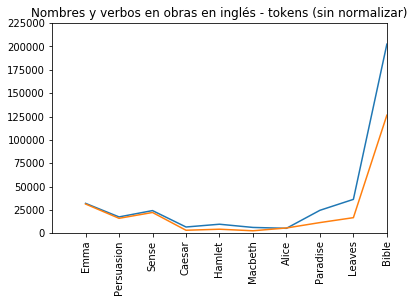

In [17]:
import matplotlib.pyplot as plt

x = []
n = []
v = []
booknames = []
i = 0

for book_id, data in books.items():
    i += 1
    x.append(i)
    n.append(data['tokens'][0])
    v.append(data['tokens'][1])
    booknames.append(book_id)

plt.plot(x, n)
plt.plot(x, v)
plt.axis([0, len(x), 0, 225000])
# Ponemos un título a nuestra gráfica
plt.title('Nombres y verbos en obras en inglés - tokens (sin normalizar)')
# Escribimos las etiquetas de las columnas en vertical, para que se lean mejor
plt.xticks(x, booknames, rotation = 'vertical')
# Configuramos los márgenes
plt.margins(0.1)
# Ajustamos el espacio entre etiquetas
plt.subplots_adjust(bottom = 0.15)
plt.show()

¡En _Alicia en el país de las maravillas_ se usan en total más formas verbales que nominales! Puedes cambiarle la longitud del eje `y` para comprobarlo. Prueba a ponerlo a 20 000 (en la línea 18, la de `plt.axis`, cambiando 225000 por 20000).

Como ves, hay mucha disparidad entre obras. La Biblia es mucho más extensa que las demás, por tanto es lógico que contenga más tokens que las demás.

Ahora vamos a contar las formas únicas totales. Como no son todas las apariciones, sino que cada vez que aparezca una misma forma se va a contar como 1, esperamos que la gráfica se suavice. Esto nos puede dar una idea de la cantidad de vocabulario nominal y verbal que maneja cada autor con un poco más de rigor: demuestras que conoces una palabra tanto cuando la usas una vez como cuando la usas mil.

Pero aún tenemos que pasarle el filtro de normalización para que no tengan ventaja los textos más largos: vas a poder demostrar, con más ventaja frente a otros, que sabes muchos nombres y verbos si te dan más tiempo para hablar que los demás.

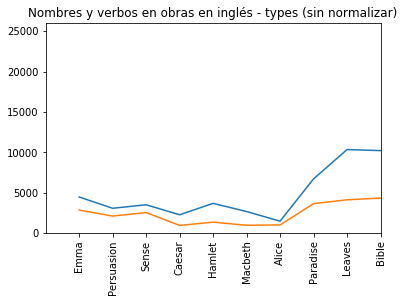

In [18]:
x = []
n = []
v = []
booknames = []
i = 0

for book_id, data in books.items():
    i += 1
    x.append(i)
    n.append(data['types'][0])
    v.append(data['types'][1])
    booknames.append(book_id)
    

plt.plot(x, n)
plt.plot(x, v)
plt.axis([0, len(x), 0, 26000])
plt.title('Nombres y verbos en obras en inglés - types (sin normalizar)')
plt.xticks(x, booknames, rotation = 'vertical')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.15)
plt.show()

Efectivamente, la gráfica se ha suavizado un poquito.
### Comparar tokens y types normalizados
Como ya hemos dicho, en la línea de comparar datos lo más equilibrados posible, no tiene mucho sentido comparar formas ni lemas totales de un corpus de 1000 palabras con los de uno de 20 000. Para analizar la variedad de léxico que hay en una obra u otra, además, no sería justo.

Así que una cosa que podemos hacer es dividir estos datos con los que hemos estado trabajando hasta ahora entre el número de palabras totales de su respectivo corpus. Es decir, la longitud del objeto que contiene el texto. Vamos a definir una función exactamente igual a la que antes definimos como `count()`, solo que esta vez dividiendo los datos entre el número total de palabras de su respectivo corpus.

In [19]:
def normalised_count(book_name):
    tokens = books[book_name]["tokens"]
    types = books[book_name]["types"]
    
    tagged = books[book_name]["tagged"]
    count = len(tagged)
    
    n_nouns = [tokens[0]/count, types[0]/count]
    n_verbs = [tokens[1]/count, types[1]/count]

    return [n_nouns, n_verbs]

In [20]:
print(normalised_count("Emma"))

[[0.1670881455796856, 0.023395990301639857], [0.1634590817842897, 0.014975102328127852]]


Volvemos a reordenar como antes:

In [21]:
for book_id,fileid in books.items():
    tokens, types = reordenar(normalised_count(book_id))
    books[book_id].update({'tokens_norm': tokens, 'types_norm': types})

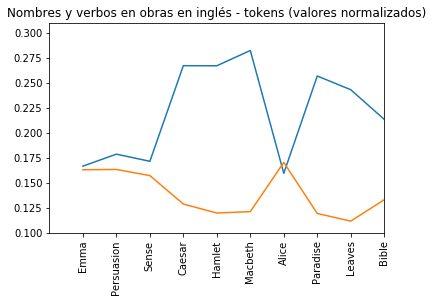

In [22]:
x = []
n = []
v = []
booknames = []
i = 0

for book_id, data in books.items():
    i += 1
    x.append(i)
    n.append(data['tokens_norm'][0])
    v.append(data['tokens_norm'][1])
    booknames.append(book_id)

plt.plot(x, n)
plt.plot(x, v)
plt.axis([0, len(x), 0.1, 0.31])
plt.title('Nombres y verbos en obras en inglés - tokens (valores normalizados)')
plt.xticks(x, booknames, rotation = 'vertical')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.15)
plt.show()

Esto ya es otra cosa: aquí podemos ver la proporción de formas totales de nombres y verbos en una comparación justa entre corpus.

Se me ocurre que en _Alicia en el país de las maravillas_ se usan más verbos que nombres porque hay mucho diálogo. Sí, Shakespeare también es diálogo, pero al fin y al cabo es teatro en verso y está más cerca de la poesía. Los libros de un mismo autor, incluso los de un mismo género, comparten muchos rasgos (y por eso hemos escogido estas obras y no otras): las obras de Jane Austen o _Alicia_ son todo novelas y andan a la par en el gráfico (entre 0,15 y 0,20 y sin mucha distancia entre formas nominales y verbales). Sin embargo, las de Shakespeare, _El paraíso perdido_ y _Hojas de hierba_ son poesía y se parecen más. ¿Qué conclusiones sacas tú?

Ahora hacemos lo mismo, pero con los types. Ahora sí podemos esperar que la gráfica nos muestre la riqueza léxica de cada obra (al menos al nivel al que nos estamos acercando a ello) y veamos qué autor se lució más en sus obras.

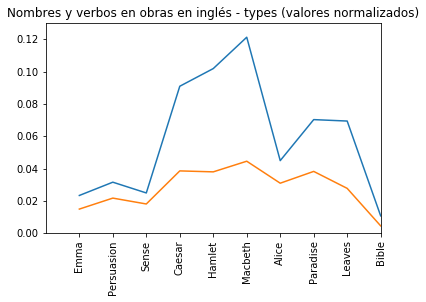

In [23]:
x = []
n = []
v = []
booknames = []
i = 0

for book_id, data in books.items():
    i += 1
    x.append(i)
    n.append(data['types_norm'][0])
    v.append(data['types_norm'][1])
    booknames.append(book_id)

plt.plot(x, n, label = 'Nombres')
plt.plot(x, v, label = 'Verbos')
plt.axis([0, len(x), 0, 0.13])
plt.title('Nombres y verbos en obras en inglés - types (valores normalizados)')
plt.xticks(x, booknames, rotation = 'vertical')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.15)
plt.show()

[¡Baia, baia!](https://img.buzzfeed.com/buzzfeed-static/static/2016-03/17/13/campaign_images/webdr11/14-situaciones-perfectas-para-decir-baia-baia-2-17132-1458237439-0_dblbig.jpg) Parece que a la hora de la verdad la Biblia es la que menos riqueza léxica tiene (esto no es necesariamente malo, solo significa que es más monotemática que las demás, lo cual es cierto), y se erige como campeón en cuanto a riqueza léxica Shakespeare en _Macbeth_ y en _Hamlet_. De nuevo, observamos cómo la poesía va por su lado y la novela por otro...

## Ejercicio
### 100301
Añade otra PoS a los gráficos: otra categoría que debería poder dar mucho juego son los adjetivos ;)


## Referencias
Muchas ideas para este cuaderno han salido del [maravilloso blog del NLP Workgroup de Michael Hemenway](http://nlpworkgroup.postach.io/).

Para hacer _PoS-tagging_ en español está el [genial cuaderno de _PoS-tagging_ de Víctor Peinado](https://github.com/vitojph/kschool-nlp/blob/master/notebooks-py3/pos-tagger-es.ipynb).

Tal vez también te interese leer el [capítulo sobre categorización y etiquetado de palabras del libro de NLTK](http://www.nltk.org/book/ch05.html).

En general, hay muchos cuadernos por la red sobre cualquier tema, en [esta recopilación](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks) hay un apartado interesante sobre _text mining_ y PLN.